# IMPORT LIBRARY

In [148]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import insightface
from insightface.app import FaceAnalysis
from facenet_pytorch import InceptionResnetV1
from PIL import Image
from torchvision import transforms
import torch

# LOAD MODEL

In [149]:
model = YOLO("best.pt")

# DISPLAY SAMPLE IMAGES

In [150]:
def display_bounding_box_image(list_image):
    num_images = len(list_image)
    cols = 5
    rows = (num_images + cols - 1) // cols  # Làm tròn lên

    plt.figure(figsize=(15, 3 * rows))  # Tùy chỉnh kích thước phù hợp
    for i, image_rgb in enumerate(list_image):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title(f"Image {i + 1}")
    
    plt.tight_layout()
    plt.show()

In [151]:
def read_image_with_yolo(model, image_path):
    image = cv2.imread(image_path)
    results = model.predict(image_path) 
    result = results[0]

    # Nếu không có box nào được dự đoán
    if len(result.boxes) == 0:
        return None, []

    # Tìm box có confidence cao nhất
    best_box = max(result.boxes, key=lambda box: float(box.conf[0]))

    x1, y1, x2, y2 = map(int, best_box.xyxy[0])
    conf = float(best_box.conf[0])
    cls = int(best_box.cls[0])
    label = f"{model.names[cls]} {conf:.2f}"

    # Vẽ bounding box và nhãn
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 1)
    cv2.putText(image, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Crop ảnh theo bounding box tốt nhất
    image_crop = image[y1:y2, x1:x2]
    image_crop = cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB)

    # Chuyển ảnh gốc sang RGB để hiển thị
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image_rgb, image_crop


image 1/1 /home/onionsm/Study/HK6/CS331/face_similarity/sample_images/6b8e57bf684a4b8531c8c080300fda80.jpg: 640x640 1 female, 29.1ms
Speed: 1.5ms preprocess, 29.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
(424, 269, 3)

image 1/1 /home/onionsm/Study/HK6/CS331/face_similarity/sample_images/2eaac1b728cd213291678558acdbb173.jpg: 640x640 1 female, 29.1ms
Speed: 1.2ms preprocess, 29.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
(241, 204, 3)

image 1/1 /home/onionsm/Study/HK6/CS331/face_similarity/sample_images/9ff85d80bf4c206a57d2169f2e1a2d52.jpg: 640x640 1 female, 29.1ms
Speed: 1.4ms preprocess, 29.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
(248, 233, 3)

image 1/1 /home/onionsm/Study/HK6/CS331/face_similarity/sample_images/1-1660274895.png: 640x640 1 female, 29.1ms
Speed: 1.9ms preprocess, 29.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
(230, 166, 3)

image 1/1 /home/onionsm/Study/HK6/CS331

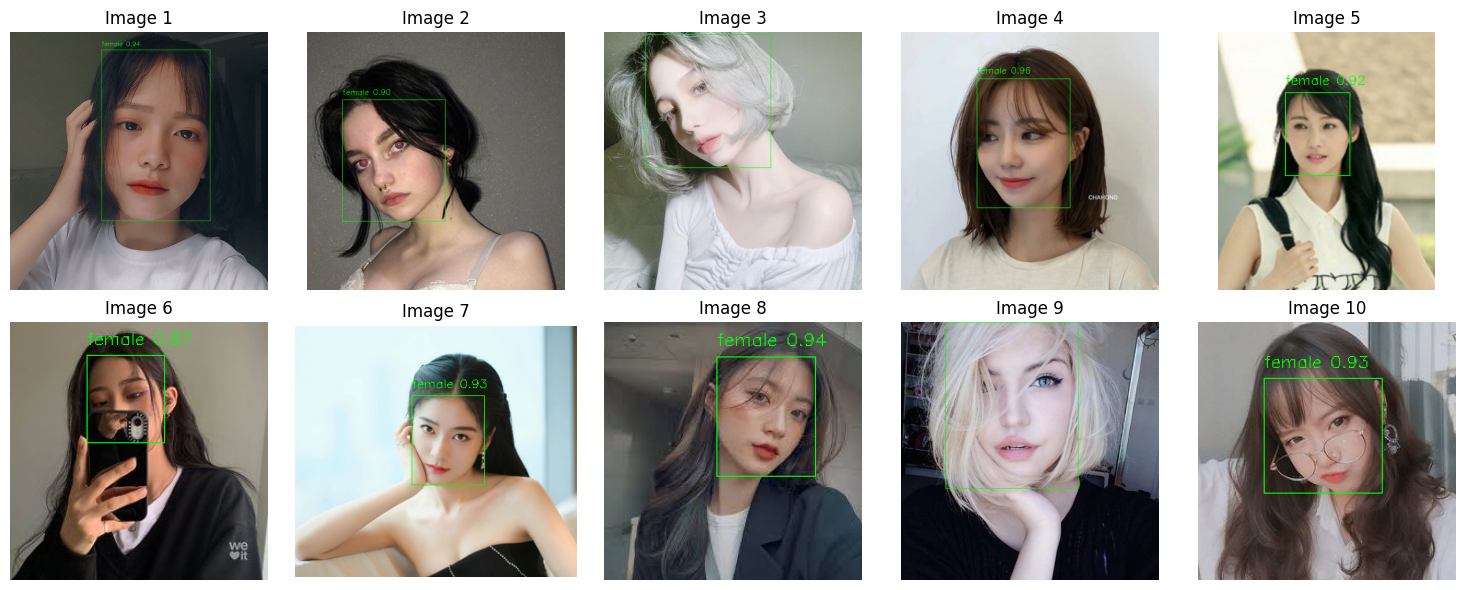

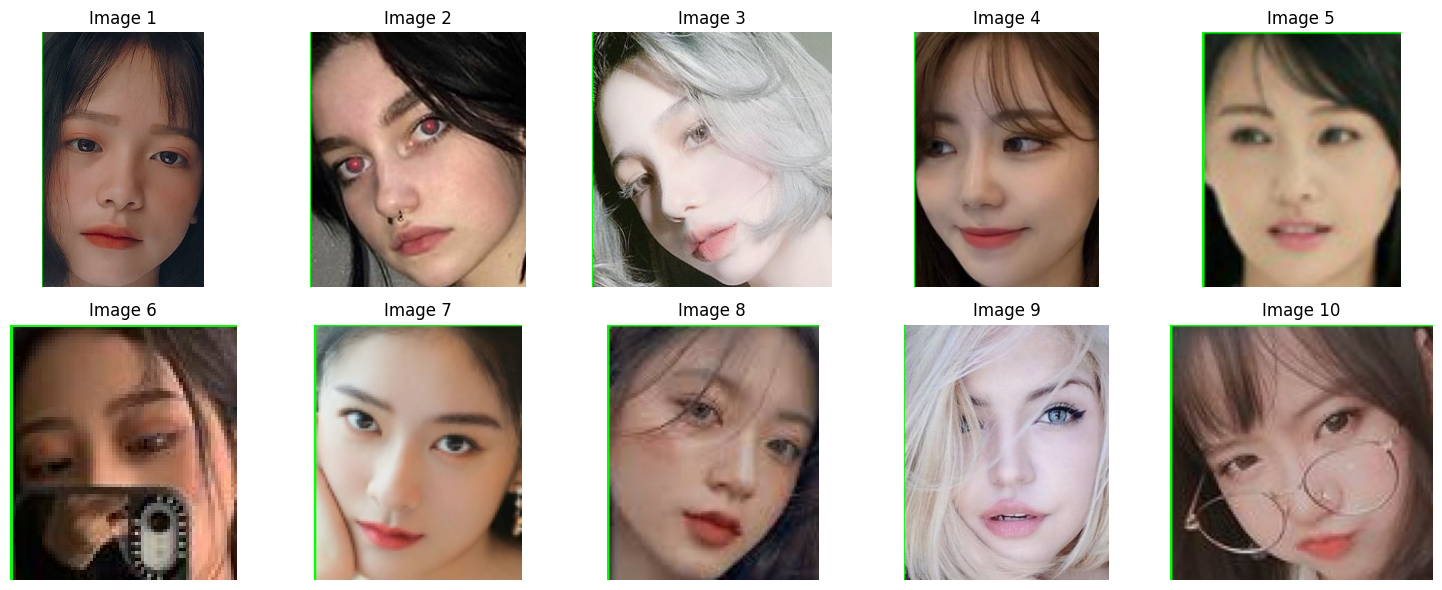

In [152]:
sample_images_folder = "sample_images"
sample_images_display = []
sample_images_crop = []

sample_images_name = os.listdir(sample_images_folder)
for f in sample_images_name:
    full_path = os.path.join(sample_images_folder, f)
    image_rgb, image_crop= read_image_with_yolo(model, full_path)
    if image_rgb is not None:
        sample_images_display.append(image_rgb)
        sample_images_crop.append(image_crop)
        print(np.array(image_crop).shape)
display_bounding_box_image(sample_images_display)
display_bounding_box_image(sample_images_crop)

# FACE DETECTION

In [153]:
IMAGE_FOLDER = "human_images"
HUMAN = ["nam","long"]

In [154]:
human_face_images_map = {}
for human in HUMAN:
    
    images_folder = os.path.join(IMAGE_FOLDER, human)
    images_display = []
    images_crop = []

    images_name = os.listdir(images_folder)
    for f in images_name:
        full_path = os.path.join(images_folder, f)
        image_rgb, image_crop= read_image_with_yolo(model, full_path)
        if image_rgb is not None:
            #image_crop = cv2.resize(image_crop, (512, 512))
            images_display.append(image_rgb)
            images_crop.append(image_crop)
            
    human_face_images_map[human] = images_crop

    # display_bounding_box_image(images_display)
    # display_bounding_box_image(images_crop)


image 1/1 /home/onionsm/Study/HK6/CS331/face_similarity/human_images/nam/IMG_20250511_221138.jpg: 640x640 1 female, 24.5ms
Speed: 2.6ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/onionsm/Study/HK6/CS331/face_similarity/human_images/nam/IMG_20250511_221140.jpg: 640x640 1 female, 24.2ms
Speed: 1.9ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/onionsm/Study/HK6/CS331/face_similarity/human_images/nam/IMG_20250511_221135.jpg: 640x640 1 male, 24.2ms
Speed: 2.4ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/onionsm/Study/HK6/CS331/face_similarity/human_images/nam/IMG_20250511_221142.jpg: 640x640 1 female, 24.3ms
Speed: 2.5ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/onionsm/Study/HK6/CS331/face_similarity/human_images/nam/IMG_20250511_221152.jpg: 640x640 1 male, 29.

In [155]:
for human in HUMAN:
    print(len(human_face_images_map[human]))

9
9


In [156]:
test_image = human_face_images_map["nam"][0]
print(test_image.shape)
print(test_image)

(1218, 1028, 3)
[[[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [ 65  47  33]
  [ 64  46  32]
  ...
  [  6   5   3]
  [  5   4   2]
  [  6   5   3]]

 [[  0 255   0]
  [ 65  47  33]
  [ 64  46  32]
  ...
  [  6   5   3]
  [  5   4   2]
  [  6   5   3]]

 ...

 [[  0 255   0]
  [183 204 199]
  [187 208 203]
  ...
  [255 189 138]
  [255 186 135]
  [255 188 137]]

 [[  0 255   0]
  [183 206 198]
  [183 206 198]
  ...
  [255 189 137]
  [255 191 139]
  [255 192 140]]

 [[  0 255   0]
  [183 206 198]
  [184 207 199]
  ...
  [255 188 136]
  [255 190 138]
  [255 192 140]]]


In [157]:
# app = FaceAnalysis(name="buffalo_s")  # Rất nhẹ, dùng MobileNet
# app.prepare(ctx_id=0)

In [158]:
facenet_model = InceptionResnetV1(pretrained='vggface2').eval()

In [159]:
transform = transforms.Compose([
        transforms.Resize((160, 160)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])

In [160]:
def get_embedding_from_numpy(image_np: np.ndarray) -> np.ndarray:
    """
    Nhận ảnh numpy RGB, trả về vector 512 chiều từ Facenet.
    """
    if image_np is None:
        return None

    # Nếu ảnh là BGR (OpenCV), chuyển sang RGB
    if image_np.shape[2] == 3:
        image_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
    else:
        image_rgb = image_np

    # Resize ảnh về 160x160
    image_resized = cv2.resize(image_rgb, (160, 160))

    # Normalize và chuyển về tensor
    image_tensor = transforms.ToTensor()(image_resized)
    image_tensor = transforms.Normalize([0.5], [0.5])(image_tensor)
    image_tensor = image_tensor.unsqueeze(0)  # B x C x H x W

    # Dự đoán
    with torch.no_grad():
        embedding = facenet_model(image_tensor)

    return embedding.squeeze().numpy()  # (512,)

In [165]:
face_db = {}
for human in HUMAN:
    list_embedding = []
    for img in human_face_images_map[human]:
        embedding = get_embedding_from_numpy(img)
        print(embedding.shape)
        list_embedding.append(embedding)
    face_db[human] = list_embedding

(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)


In [162]:
print(face_db)

{'nam': [array([   0.035754,    0.060468,   0.0058283,    0.052458, -0.00019517,    0.021628,   -0.056446,    0.013491,    0.057912,   0.0065746,    0.052408,    0.040535,  -0.0080851,     -0.0133,   -0.033114,    0.055908,    0.099232,    0.030054,    -0.02556,    0.010834,    0.026231,   -0.039012,    0.088798,   -0.040374,
        -0.0091419,  -0.0086144,    0.076509,   0.0067127,    0.019838,    0.042862,    0.017332,    0.029047,   -0.022142,    0.066089,  0.00033011,   0.0025784,   0.0060901,    -0.09756,   -0.053516,    0.051488,    0.038915,   -0.056815,   0.0011626,     0.02328,   -0.057727,    0.016855,   0.0021104,    0.050126,
         -0.041794,    0.016691,    -0.01372,   -0.049905,    0.036699,    0.019915,    0.015062,   -0.023722,   0.0057341,  -0.0093996,    0.064763,   0.0094974,   -0.012544,      0.0596,   -0.037081,     0.08716,    0.045049,    0.011402,   -0.019456,   -0.047665,    0.047042,   -0.046198,  0.00099979,    0.011119,
        -0.0043653,    0.043215,  

In [163]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recognize(vec_new, db, threshold=0.5):
    best_score = -1
    best_name = "Unknown"

    for name, vec_list in db.items():
        for vec in vec_list:
            score = cosine_similarity([vec_new], [vec])[0][0]
            if score > best_score:
                best_score = score
                best_name = name

    if best_score >= threshold:
        return best_name, best_score
    else:
        return "Unknown", best_score

In [ ]:
_, query_image = read_image_with_yolo(model, "Screenshot from 2025-05-12 01-00-35.png")
query_embedding = get_embedding_from_numpy(query_image)
print(query_embedding.shape)


image 1/1 /home/onionsm/Study/HK6/CS331/face_similarity/Screenshot from 2025-05-12 01-00-35.png: 640x640 1 female, 1 male, 29.1ms
Speed: 10.3ms preprocess, 29.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
(512,)


In [168]:
name, score = recognize(query_embedding,face_db)
print(name)
print(score)

long
0.83199865
